## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting? 
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Regression aims to predict a continous model and will use something like a line of best fit to do so. Classification aims to predict what category something falls into.
2. A confusion table is a way to evaluate the accuracy of a classification model. It will give information on true positives, false positives, true negatives, and false negatives.
3. SSE is the sum of squared errors and will give a measure of accuracy for a regression model (smaller SSE = more accurate model).
4. Overfitting is making a model that is too influenced by each individual data point that it is based on. An overfit model will give more information about the data you already have, rather than being effective at predicting where new data will fall. Underfitting is the opposite where trends are too generalized and no nuance is reflected in a model.
5. It is important to split data into train and test tests so we can evaluate a model on unseen (test data) to understand how it will perform. Choosing k based on the results of the test set is a the best method to determine what the best k valule will be when using a model on actual data.
6. Reporting a class label as a prediction is a strong method because it is clear and understandable what the most likely classification for a label is, however, this can erase complexities and the recognition of other possible outcomes that could be important to understand. Reporting a class label as a probability distribution is helpful for grasping a full understanding of the different possibilities and how likely they are for a given label, however, this can become exceedingly complex quickly and can result in an overwhelming number of possibilities that are harder to sort out.

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

Part 1

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/Users/kieranperdue/DS 3021/knn/data/USA_cars_datasets.csv')
df = df[['price', 'year', 'mileage']]
print('Price Nulls:', df['price'].isnull().sum(), 'Year Nulls:', df['year'].isnull().sum(), 'Mileage Nulls:', df['mileage'].isnull().sum())
print(df.shape)
df.head()

Price Nulls: 0 Year Nulls: 0 Mileage Nulls: 0
(2499, 3)


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


Part 2

In [4]:
max_year = df['year'].max()
min_year = df['year'].min()
max_mile = df['mileage'].max()
min_mile = df['mileage'].min()

df['year'] = (df['year']-min_year)/(max_year-min_year)
df['mileage'] = (df['mileage']-min_mile)/(max_mile-min_mile)
print(df['year'].describe())
print(df['mileage'].describe())

count    2499.000000
mean        0.930091
std         0.073248
min         0.000000
25%         0.914894
50%         0.957447
75%         0.978723
max         1.000000
Name: year, dtype: float64
count    2499.000000
mean        0.051377
std         0.058654
min         0.000000
25%         0.021088
50%         0.034742
75%         0.062354
max         1.000000
Name: mileage, dtype: float64


Part 3

In [5]:
from sklearn.model_selection import train_test_split

X = df[['mileage', 'year']] 
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Part 4

In [6]:
def knn_reg(x_hat,gdf,K):
    # Compute distances between x_hat and the data:  
    squared_differences = (x_hat - gdf.loc[:,['mileage','year']])**2
    distances = np.sum( squared_differences , axis = 1)
    # Find k smallest values in dist:
    neighbors = np.argsort(distances)[:K].tolist()
    # Find y values for the nearest neighbors:
    y_star = gdf['price'].iloc[neighbors].tolist()
    # Average neighbor values to get prediction:
    y_hat = np.mean(y_star)
    # Return a dictionary of computed values of interest:
    return(y_hat)

In [7]:
import matplotlib.pyplot as plt

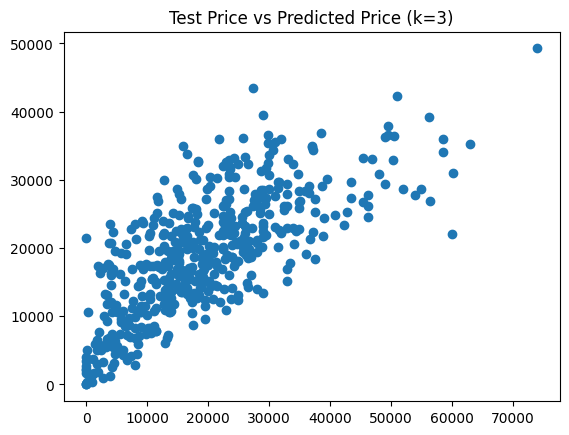

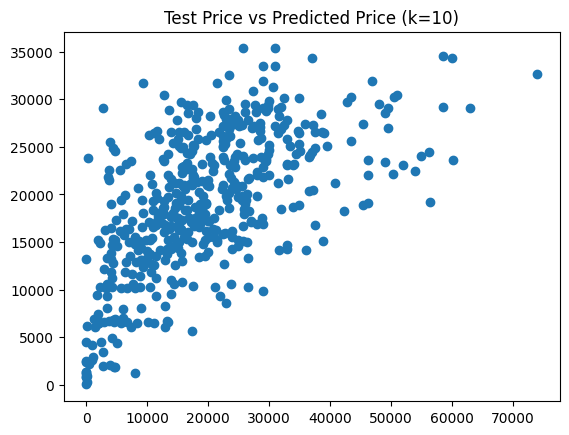

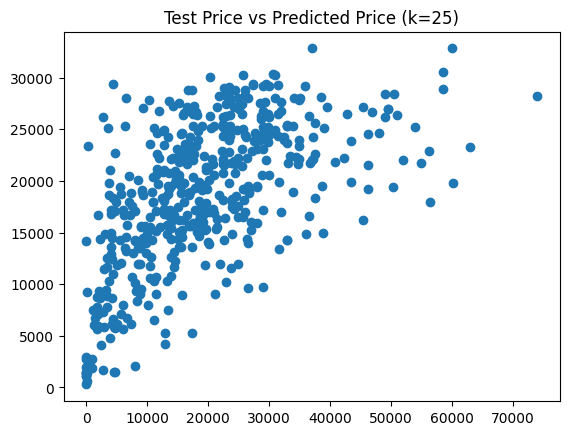

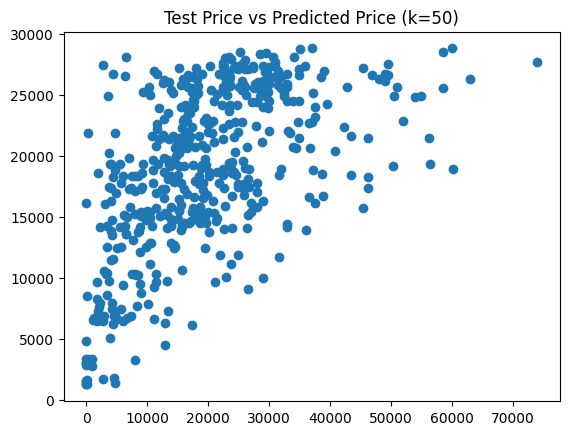

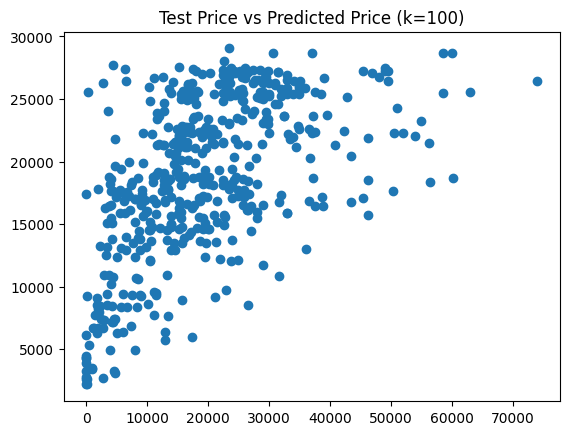

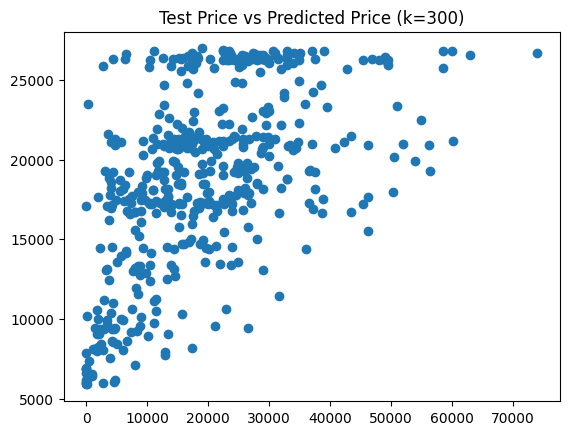

In [8]:
k_values = [3,10,25,50,100,300]
mse_dict = {}

# Iterate over each k value
for k in k_values:
    # Make predictions for the test set
    y_pred = []
    for i in range(len(X_test)):
        x_hat = X_test.iloc[i].values
        predicted_price = knn_reg(x_hat, df, k)  # Get prediction for each test point
        y_pred.append(predicted_price)
    
    # Calculate MSE for this k
    y_test_array = np.array(y_test)  # Convert y_test to a NumPy array
    y_pred_array = np.array(y_pred)  # Convert y_pred to a NumPy array
    mse = np.mean((y_test_array - y_pred_array) ** 2) 
    mse_dict[k] = mse  # Store MSE for this k
    plt.scatter(y_test_array, y_pred_array)
    plt.title(f'Test Price vs Predicted Price (k={k})')
    plt.show()

These plots show that as k increases there are more errors in the predicted price. This makes sense because the model is trending towards underfitting and not evaluating specific enough trends to accurately predict car price.

Part 5

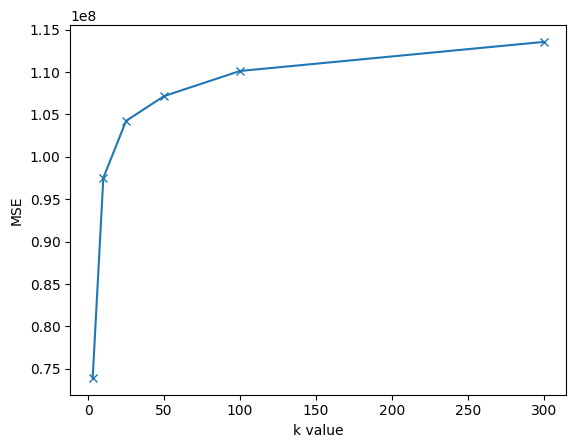

In [9]:
plt.plot(k_values, list(mse_dict.values()), marker='x')
plt.xlabel('k value')
plt.ylabel('MSE')
plt.show()

From this plot, according to the elobow point, 25 seems to be the best value of k to avoid either an overfit or underfit model.

Part 6

As k increased from 3 to 300 the models went from overfitting to underfitting. When only taking the 3 nearest neighbors into account, the graph of y_test vs. y_pred shows that the predicitions were very accurate but this is because they are hyper specific and not general enough to be accurate predictors. When k increases too much (100 and 300) the correlation between y_test and y_pred becomes too loose as the model is too general due to underfitting, resulting in poor predictive ability. 

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data. 

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data. 
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE. 
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.